In [0]:
#1. Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
#2. Loading the dataset
data = pd.read_csv('https://raw.githubusercontent.com/deboraxhx/cursoDataScience/master/AB_NYC_2019.csv?token=ANX7EF4IQ6AHWZX3IO6VJTK6HGVZG')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [0]:
#3. Analise superficial do dataset
print("data shape : ",data.shape)
data.describe()

data shape :  (48895, 16)


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**Questão que quero analisar:
Se ter mais lugares para alugar por preços maiores compensa mais do que ter poucos lugares a preços mais baixo:**

Predict NYC Airbnb Rental Prices


Os ultimos dados armazenados no nosso dataset é de julho de 2019

**Criando colunas adicionais**

In [0]:
#ultimo ano em que foi alugado
data['last_year'] = data['last_review'].str[0:4]

In [0]:
#agora criando uma nova coluna para o ano inicial de cada local. 
#supondo que os meses contados em para o calculo de 'last_review' não tenha interrupções.
#primeiro tenho que transformar os anos e meses em inteiro
#data['last_year']  = data['last_year'].astype('int32') #não converte NaN. Então temos que lidar com os NaN                            

Substituindo NaN em reviews per months por 0

In [0]:
data.fillna({'reviews_per_month':0}, inplace=True)
data.fillna({'last_review':0}, inplace=True)
data.fillna({'last_year':0}, inplace=True)
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_year
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018


**Deletando NaN do dataset**

In [0]:
data.isnull().sum()
data.dropna(how='any',inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 17 columns):
id                                48858 non-null int64
name                              48858 non-null object
host_id                           48858 non-null int64
host_name                         48858 non-null object
neighbourhood_group               48858 non-null object
neighbourhood                     48858 non-null object
latitude                          48858 non-null float64
longitude                         48858 non-null float64
room_type                         48858 non-null object
price                             48858 non-null int64
minimum_nights                    48858 non-null int64
number_of_reviews                 48858 non-null int64
last_review                       48858 non-null object
reviews_per_month                 48858 non-null float64
calculated_host_listings_count    48858 non-null int64
availability_365                  48858 non-null int64

In [0]:
data['last_year']  = data['last_year'].astype('int32')

**Lidando com colunas redundantes**

In [0]:
df = data.drop(['host_name', 'id', 'name', 'last_review' ], axis=1)

In [0]:
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_year
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,2018
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,2019
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,0
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,2019
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,2018


**Data Exploratory and Data Visualization**


*   Pretendo fazer uma analise de cada variavel da esquerda para a direita, usando primeiramente uma analise Univariada.
*   Após, irei fazer uma abordagem mais filosófica e relacionareis algumas variaves que acredito que mais se correlacionam.
*   E por ultimo analisarei multvariadamente.




In [0]:
#1. analise da variavel host_id
#quantidade de host
df['host_id'].nunique()

37425

In [0]:
df['host_id'].value_counts()

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
            ... 
208106618      1
235939247      1
81747071       1
6470787        1
1288080        1
Name: host_id, Length: 37425, dtype: int64

In [0]:
# Analisando a variavel'neighbourhood_group'
df['neighbourhood_group'].value_counts()

Manhattan        21643
Brooklyn         20089
Queens            5664
Bronx             1089
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [0]:
n_points = df.shape[0]
max_count = df['neighbourhood_group'].value_counts().max()
max_prop = max_count / n_points
print(max_prop)


0.44297760857996643


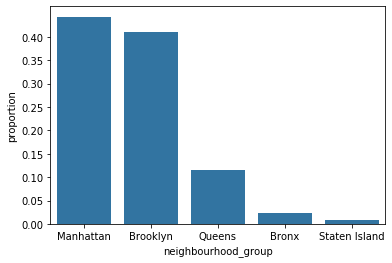

In [0]:
# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
cat_order = df['neighbourhood_group'].value_counts().index
base_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'neighbourhood_group', color = base_color, order = cat_order)
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion');

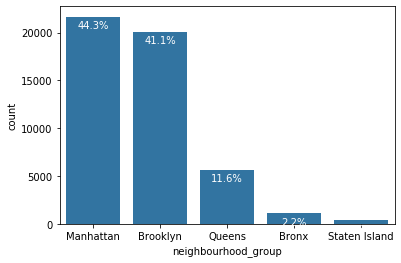

In [0]:
# create the plot
base_color = sns.color_palette()[0]
cat_order = df['neighbourhood_group'].value_counts().index
sns.countplot(data = df, x = 'neighbourhood_group', color = base_color, order = cat_order)


# add annotations
n_points = df.shape[0]
cat_counts = df['neighbourhood_group'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
  count = cat_counts[label.get_text()]
  pct_string = '{:0.1f}%'.format(100*count/n_points)

  # print the annotation just below the top of the bar
  plt.text(loc, count-1200, pct_string, ha = 'center', color = 'w')

In [0]:
# variavel 'neighbourhood'

df['neighbourhood'].value_counts()

Williamsburg          3917
Bedford-Stuyvesant    3713
Harlem                2655
Bushwick              2462
Upper West Side       1969
                      ... 
Rossville                1
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Woodrow                  1
Name: neighbourhood, Length: 221, dtype: int64

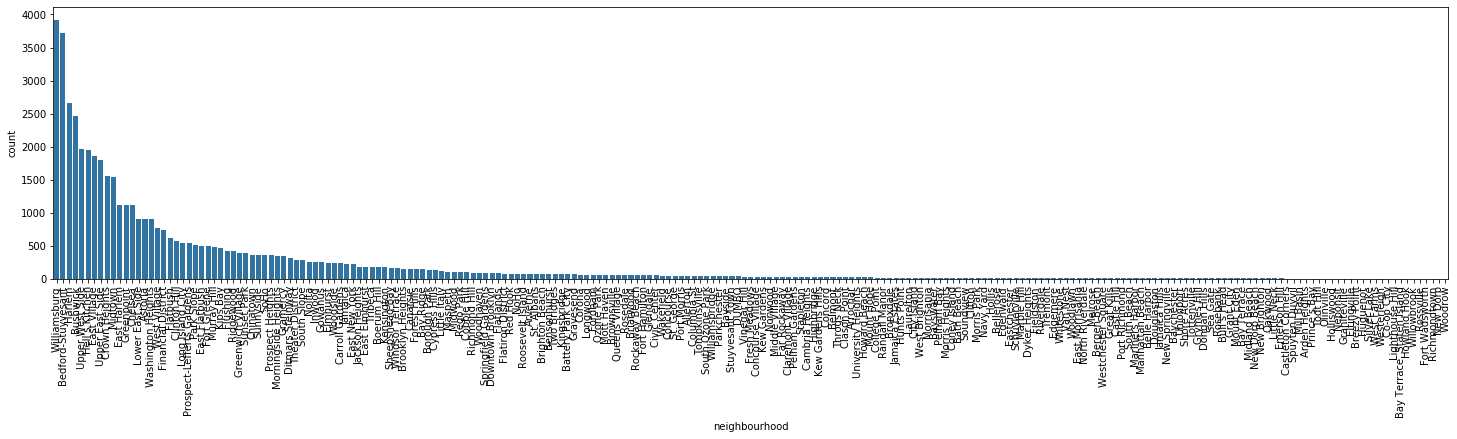

In [0]:
plt.figure(figsize = [25, 5])
base_color = sns.color_palette()[0]
cat_order = df['neighbourhood'].value_counts().index
sns.countplot(data = df, x='neighbourhood', color = base_color, order = cat_order); 
plt.xticks(rotation = 90); 

In [0]:
#variavel room_type
df['room_type'].value_counts()

Entire home/apt    25393
Private room       22306
Shared room         1159
Name: room_type, dtype: int64

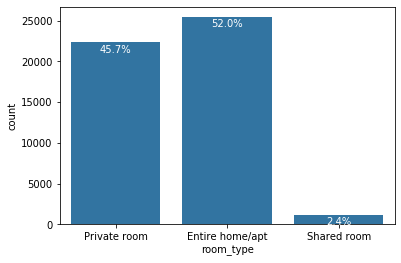

In [0]:
base_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'room_type', color = base_color)

n_points = df.shape[0]
cat_counts = df['room_type'].value_counts()
locs, labels = plt.xticks() 


for loc, label in zip(locs, labels):
  count = cat_counts[label.get_text()]
  pct_string = '{:0.1f}%'.format(100*count/n_points)
  plt.text(loc, count-1200, pct_string, ha = 'center', color = 'w')

In [0]:
#variavel price
df['price'].describe()

count    48858.000000
mean       152.740309
std        240.232386
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

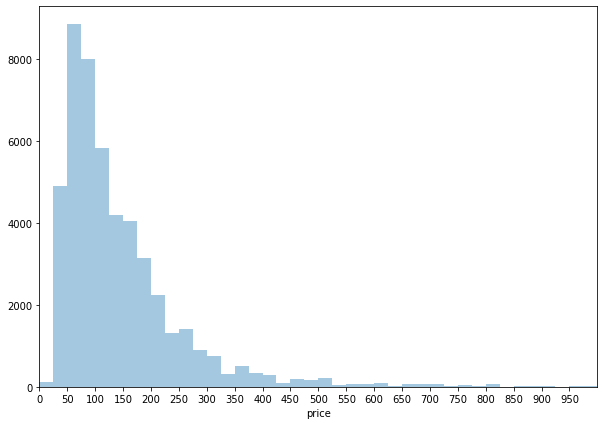

In [0]:
tick_props = np.arange(0, 1000, 50)

plt.figure(figsize = [10, 7])
plt.subplot()
sns.distplot(df['price'], bins = 400, kde = False);
plt.xlim(0, 1000)
plt.xticks(tick_props);

In [0]:
#variavel minimum_nights
df['minimum_nights'].describe()

count    48858.000000
mean         7.012444
std         20.019757
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [0]:
df['minimum_nights'].value_counts()

1      12700
2      11694
3       7996
30      3759
4       3297
       ...  
87         1
183        1
39         1
250        1
58         1
Name: minimum_nights, Length: 108, dtype: int64

(1, 40)

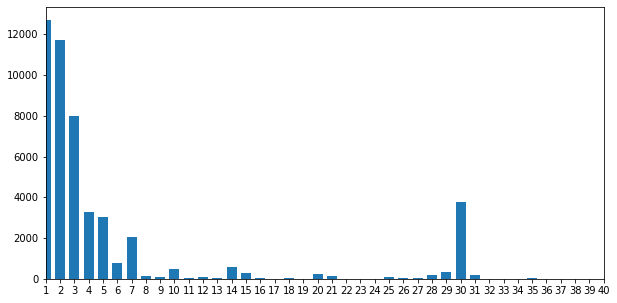

In [0]:
plt.figure(figsize= [10,5])
bin_edges = np.arange(0.5, 365.5+1, 1)
plt.hist(df['minimum_nights'], bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(1, 365+1, 1)); 
plt.xlim(1,40)

In [0]:
#variavel number_of_reviews
print('total de reviews:', df['number_of_reviews'].sum())

total de reviews: 1137077


In [0]:
df['number_of_reviews'].describe()

count    48858.000000
mean        23.273098
std         44.549898
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [0]:
df['number_of_reviews'].sort_values(ascending = False).iloc[0:20]

11759    629
2031     607
2030     597
2015     594
13495    576
10623    543
1879     540
20403    510
4870     488
471      480
1271     474
113      467
8001     466
13612    459
225      458
1103     454
1190     451
9323     448
2163     447
257      441
Name: number_of_reviews, dtype: int64